<a href="https://colab.research.google.com/github/neto-riga/Metodos_Numericos/blob/main/Ejercicio_3_Posici%C3%B3n_Falsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/Metodos_Numericos/blob/main/Portafolio.md#índice)

# Método de la posición falsa
#### Martínez Venegas Raúl
#### Rivera Gálvez Ernesto
---
La profundidad normal *y* del flujo en un canal rectangula abierto de ancho *w* está relacionada con el caudal *Q*, la pendiente del canal *s* y el coeficiente de fricción de Manning *n* mediante las ecuaciones 


$$y\left( \frac{wy}{w+2y} \right) ^{2/3}=c=\frac{nQ}{w\sqrt{s}}$$ 


- Determinar *y* usando el método de la posición falsa para los datos: 


$$w=15m; Q=20m^3/s; n=0.015; s=0.001$$


- Elabora la gráfica para elegir el intervalo inicial.
- Con un error relativo porcentual de 0.00002%



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from pandas import DataFrame
sns.set_theme()

Debemos resolver la ecuación de cuando $y\left( \frac{wy}{w+2y} \right) ^{2/3}=c=\frac{nQ}{w\sqrt{s}}$ o bien, podríamos reescribir como:

$$y\left( \frac{wy}{w+2y} \right) ^{2/3}-\frac{nQ}{w\sqrt{s}}=0$$

Pues al ser ambos, el minuendo y el sustraendo c, podemos decir con certeza que la resta será igual a cero.

Para resolver la ecuación, tomaremos:

$$Y=f(y)=y\left( \frac{wy}{w+2y} \right) ^{2/3}-\frac{nQ}{w\sqrt{s}}$$

de modo que la solución a la ecuación serán los valores de $y$ para los cuales la función $f(y)$ es cero.

Sustituyendo los valores $w, n, Q, s$ simplificamos la función a la siguiente:

$$f(y)=y \cdot \left( \frac{15y}{15+2y}\right)^{2/3}- \sqrt{0.4}$$

In [ ]:
def f(y):
  j=y*(((15*y/(15+2*y))**2)**(1/3))-np.sqrt(0.4)
  return j

Realizamos la gráfica de la función para seleccionar el intervalo en el que puede encontrarse una raíz y así iniciar el método de la posición falsa

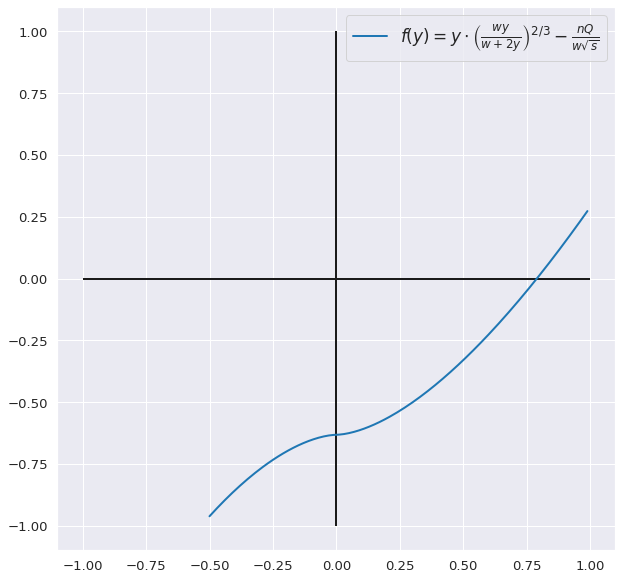

In [ ]:
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 10))

X = np.arange(-0.5, 1, 0.01)
plt.plot(X, [f(x) for x in X],'tab:blue', label=r'$f(y)=y\cdot\left( \frac{wy}{w+2y} \right) ^{2/3}-\frac{nQ}{w\sqrt{s}}$')
plt.rc('legend', fontsize=17)
plt.hlines(y=0, xmin=-1, xmax=1)
plt.vlines(x=0, ymin=-1, ymax=1)
plt.legend()

Notamos que una raíz se encuentra entre el cero y el uno, así *a=0* y *b=1*. Colocamos la condición para que se repita el proceso hasta encontrar la aproximación de la raíz, que es una tolerancia en el error relativo porcentual de $2\mathrm{e}{-5}\%$.
Verificamos que es producto de *f(a)* y *f(b)* sea menor a cero, ya que si no cumple esa condición entonces *f(a)* y *f(b)* tienen el mismo signo, por lo que nuestro intervalo [a,b] ya no contendría a la raíz. Calculamos el error absoluto, el error relativo y el error relativo porcentual.  

In [ ]:
a=[0]
b=[1]
erp=[1]
err=['NA']
era=['NA']
x2=[a[0]-f(a[0])*((b[0]-a[0])/(f(b[0])-f(a[0])))]
i=0

while erp[i] > 0.00002:
  
  if f(x2[i])*f(a[i]) > 0 :
    a.append(x2[i])
    b.append(b[i])
  else:
    b.append(x2[i])
    a.append(a[i])

  i+=1
  x2.append(a[i]-f(a[i])*((b[i]-a[i])/(f(b[i])-f(a[i]))))
  era.append(abs(x2[i]-x2[i-1]))
  err.append((abs(x2[i]-x2[i-1])/abs(x2[i])))
  erp.append((abs(x2[i]-x2[i-1])/abs(x2[i]))*100)
  
erp[0]='NA'

Después creamos una tabla con todos los valores para analizar los resultados

In [ ]:
tabla = {
    'a': a,
    'f(a)': [f(a[int(elem)]) for elem in range(0,len(a))],
    'b': b,
    'f(b)': [f(b[int(h)]) for h in range(0,len(b))],
    'x2': x2,
    'f(x2)': [f(x2[int(p)]) for p in range(0,len(x2))],
    'error absoluto': era,
    'error relativo': err,
    'error relativo porcentual [%]': erp,
}

Tabla = DataFrame(tabla)
Tabla

,a,f(a),b,f(b),x2,f(x2),error absoluto,error relativo,error relativo porcentual [%]
0,0.000000,-6.324555e-01,1,0.287489,0.687493,-1.273436e-01,NA,NA,NA
1,0.687493,-1.273436e-01,1,0.287489,0.783425,-9.347201e-03,0.0959321,0.122452,12.2452
2,0.783425,-9.347201e-03,1,0.287489,0.790245,-6.273462e-04,0.00681982,0.00863,0.863
3,0.790245,-6.273462e-04,1,0.287489,0.790702,-4.184796e-05,0.000456722,0.000577616,0.0577616
4,0.790702,-4.184796e-05,1,0.287489,0.790732,-2.790382e-06,3.04618e-05,3.85235e-05,0.00385235
5,0.790732,-2.790382e-06,1,0.287489,0.790734,-1.860550e-07,2.03114e-06,2.56868e-06,0.000256868
6,0.790734,-1.860550e-07,1,0.287489,0.790735,-1.240561e-08,1.35431e-07,1.71272e-07,1.71272e-05


Podemos ver que después de 7 iteraciones se alcanzó la tolerancia con un error relativo porcentual de $1.71\mathrm{e}{-5}\%$ con la solución aproximada de $y=0.790735$ siendo esta última nuestra solución aproximada de la ecuación inicial. A continucación  podemos observar como se genera la posición falsa en cada una de las siete iteraciones.

In [ ]:
%%capture

sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

lim_inf = -0.05
lim_sup = 1.09
X = np.arange(lim_inf, lim_sup, 0.05)

fig = plt.figure(figsize=(16,8))
eje1=plt.subplot(111)

eje1.plot(X, [f(x) for x in X], c='darkred')
eje1.axhline(y=0, linestyle='--', c='k')

linea1, = eje1.plot([], [], 'o-', c='darkslateblue', lw=1.5)
linea2, = eje1.plot([], [], '^', c='darkslategray', ms=9, alpha=0.5)

eje1.legend([r'$f(y)=y\cdot\left( \frac{wy}{w+2y} \right) ^{2/3}-\frac{nQ}{w\sqrt{s}}$',
            'Eje y=0',
            r'Rectas de f(a) a f(b)',
             'Aproximaciones'],
            loc="lower right")

lineax = []
lineay = []
puntox = []
puntoy = []

def funcion_cuadros(i):
  lineax.append(a[i])
  lineay.append(f(a[i]))
  lineax.append(b[i])
  lineay.append(f(b[i]))
  puntox.append(x2[i])
  puntoy.append(0)
  puntox.append(x2[i])
  puntoy.append(0)

  linea1.set_xdata(lineax)
  linea1.set_ydata(lineay)
  linea2.set_xdata(puntox)
  linea2.set_ydata(puntoy)

  return (linea1,linea2)

anim = FuncAnimation(fig, func=funcion_cuadros, frames=np.arange(0, len(x2), 1, dtype=int), interval=700, blit=True)

In [ ]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
anim

Vemos que el valor siempre se acerca a la raíz y queda claro como $f(1)$ queda como pivote mientras el límite inferior es el que cambia en cada iteración.

:Finalmente observamos como converge nuestro método, pues los errores siempre diminuyen hasta alcanzar la tolerancia de $2\mathrm{e}{-5}\%$.

Text(0, 0.5, '[%]')

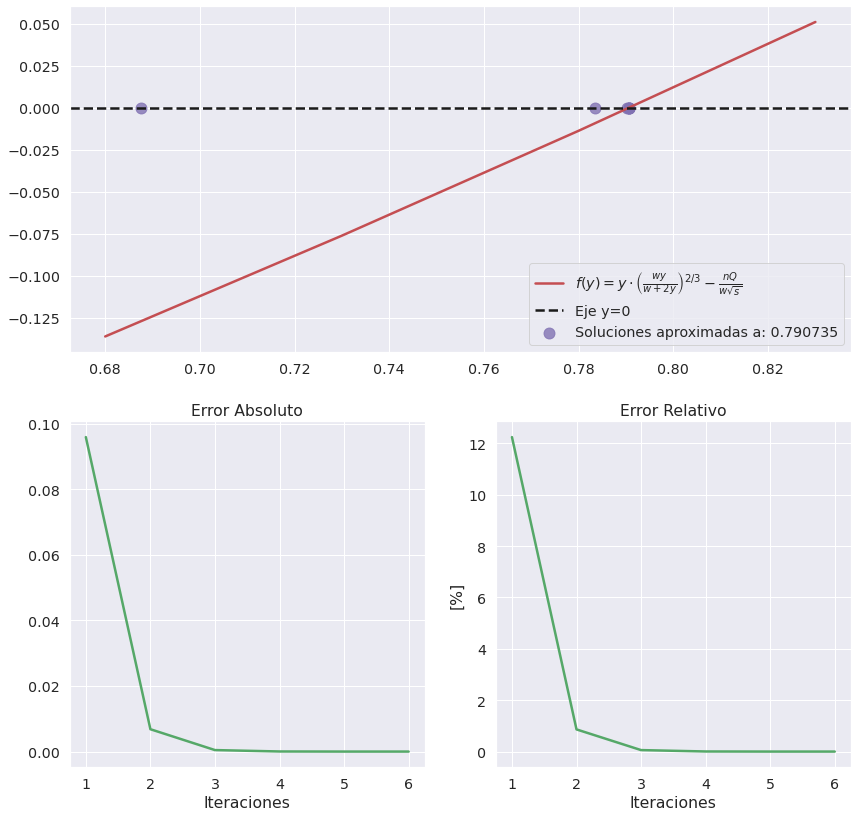

In [ ]:
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

lim_inf = 0.68
lim_sup = 0.85
X = np.arange(lim_inf, lim_sup, 0.05)

fig = plt.figure(figsize=(14,14))
eje1=plt.subplot(211)
eje2=plt.subplot(223)
eje3=plt.subplot(224)

eje1.plot(X, [f(x) for x in X], c='r')
eje1.scatter(x2, np.zeros(len(x2)), c='m', marker='o', s=120, alpha=0.8)
eje1.axhline(y=0, linestyle='--', c='k')

eje1.legend([r'$f(y)=y\cdot\left( \frac{wy}{w+2y} \right) ^{2/3}-\frac{nQ}{w\sqrt{s}}$',
             'Eje y=0',
            'Soluciones aproximadas a: {0:7g}'.format(x2[-1])],
            loc="lower right")

eje2.plot(np.arange(1, len(era)), era[1:], c='g')
eje2.set_title('Error Absoluto')
eje2.set_xlabel('Iteraciones')

eje3.plot(np.arange(1, len(era)), erp[1:], c='g')
eje3.set_title('Error Relativo')
eje3.set_xlabel('Iteraciones')
eje3.set_ylabel('[%]')

Se puede apreciar como en la segunda iteración el error disminuye de forma dramática, apreciando la eficiencia con la que el método converge.

### ¡Viva México chihuahua!

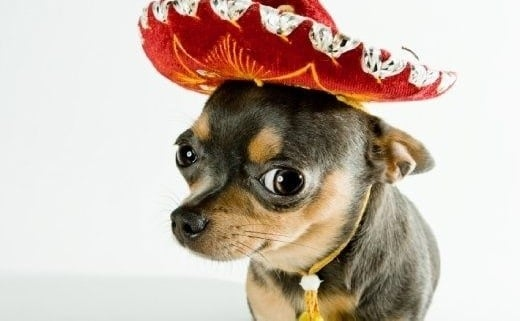

## [Regresar al ínidce](https://github.com/neto-riga/Metodos_Numericos/blob/main/Portafolio.md#índice)